# **Exploratory Data Analysis (EDA) for Real Estate Pricing: Unveiling the Dynamics of House Valuation in a Dynamic Market**

# **Problem Statement:**
In the dynamic landscape of the residential real estate market, determining an optimal and competitive price for a house is a multifaceted challenge. As a key member of the analytics team in a leading real estate company, your task is to conduct a comprehensive analysis to identify and understand the myriad variables that significantly influence house prices. By leveraging advanced data analytics techniques and visualization tools, your goal is to uncover patterns, correlations, and trends within the dataset, enabling the company to make informed decisions and strategically position properties for better business opportunities.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **1. Loading the Data**

In [88]:
df=pd.read_csv("/content/drive/MyDrive/assignment2/housing_data.csv")

In [89]:
df

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

**Use the shape parameter to get the shape of the dataset.**

In [90]:
print("shape of the data is " ,df.shape)

shape of the data is  (1460, 81)


In [91]:
df.columns #check all the columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

**It filters columns that have object data types, which typically represent strings or categorical variables.**

In [171]:
cf=df.select_dtypes(include=['object']).columns.to_list()
cf

['LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [169]:
df2=df.select_dtypes(include=['number']).columns.to_list()
df2

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

**The information about the data type of the data set.**

In [94]:
# Getting the informaatin of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Display the first five rows of the data set.**

In [95]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## **i) Descriptive Statistics**

Summary Statistics
- **Measure of central Tendancy**
- **Mean**: Mean is the average of all values
- **mode**: Median is the middle value when data is sorted.
-**Median** : Mode is the most frequently occurring value in the dataset.
-**Describe()** is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.


In [96]:
df.describe(include='all')

Unnamed: 0 MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000       1460     1460  1460.000000    1460.000000   1460   
unique          NaN         15        5          NaN            NaN      2   
top             NaN       SC20       RL          NaN            NaN   Pave   
freq            NaN        536     1151          NaN            NaN   1454   
mean     729.500000        NaN      NaN    57.623288   10516.828082    NaN   
std      421.610009        NaN      NaN    34.664304    9981.264932    NaN   
min        0.000000        NaN      NaN     0.000000    1300.000000    NaN   
25%      364.750000        NaN      NaN    42.000000    7553.500000    NaN   
50%      729.500000        NaN      NaN    63.000000    9478.500000    NaN   
75%     1094.250000        NaN      NaN    79.000000   11601.500000    NaN   
max     1459.000000        NaN      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC Fence  \
count     91     1460        1460      1460  ...  1460.000000   1460  1460   
unique     2        4           4         2  ...          NaN      4     5   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     No    No   
freq      50      925        1311      1459  ...          NaN   1453  1179   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN   NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN   NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN   NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN   NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN   NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN   NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN   NaN   

       MiscFeature       MiscVal MoSold       YrSold  SaleType  SaleCondition  \
count         1460   1460.000000   1460  1460.000000      1460           1460   
unique           5           NaN     12          NaN         9              6   
top             No           NaN    Jun          NaN        WD         Normal   
freq          1406           NaN    253          NaN      1267           1198   
mean           NaN     43.489041    NaN  2007.815753       NaN            NaN   
std            NaN    496.123024    NaN     1.328095       NaN            NaN   
min            NaN      0.000000    NaN  2006.000000       NaN            NaN   
25%            NaN      0.000000    NaN  2007.000000       NaN            NaN   
50%            NaN      0.000000    NaN  2008.000000       NaN            NaN   
75%            NaN      0.000000    NaN  2009.000000       NaN            NaN   
max            NaN  15500.000000    NaN  2010.000000       NaN            NaN   

            SalePrice  
count     1460.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean    180921.195890  
std      79442.502883  
min      34900.000000  
25%     129975.000000  
50%     163000.000000  
75%     214000.000000  
max     755000.000000  

[11 rows x 81 columns]

 -**Measure of dispersion**: Measures of Dispersion are used to represent the scattering of data. These are the numbers that show the various aspects of the data spread across various parameters.
 - **Range**: It is defined as the difference between the largest and the smallest value in the distribution.
 -**Starndard deviation**: It is the square root of the arithmetic average of the square of the deviations measured from the mean.
 -**percentiles**:  How many of the values are less than the given percentile


In [97]:
df['SalePrice'].min()

34900

In [98]:
df['SalePrice'].max()

755000

In [99]:
df.describe(include=[object])

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count        1460     1460   1460    91     1460        1460      1460   
unique         15        5      2     2        4           4         2   
top          SC20       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq          536     1151   1454    50      925        1311      1459   

       LotConfig LandSlope Neighborhood  ... GarageFinish GarageQual  \
count       1460      1460         1460  ...         1460       1460   
unique         5         3           25  ...            4          6   
top       Inside       Gtl        NAmes  ...          Unf         TA   
freq        1052      1382          225  ...          605       1311   

       GarageCond PavedDrive PoolQC Fence MiscFeature MoSold SaleType  \
count        1460       1460   1460  1460        1460   1460     1460   
unique          6          3      4     5           5     12        9   
top            TA          Y     No    No          No    Jun       WD   
freq         1326       1340   1453  1179        1406    253     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 45 columns]

In [100]:
stat_num=df.describe(include=['int','float'])
stat_num

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

**Percentile**

In [101]:
#calculate no percentiles for each numeric variable
df.describe(percentiles=[])

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[6 rows x 36 columns]

In [102]:
print(df.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


**Range**

In [103]:
#calculate range for each numeric variable
range_num_data= stat_num.max()-stat_num.min()

In [104]:
range_num_data

Unnamed: 0         1460.000000
LotFrontage        1460.000000
LotArea          213945.000000
OverallQual        1459.000000
OverallCond        1459.000000
YearBuilt          1979.797096
YearRemodAdd       1989.354593
MasVnrArea         1600.000000
BsmtFinSF1         5644.000000
BsmtFinSF2         1474.000000
BsmtUnfSF          2336.000000
TotalBsmtSF        6110.000000
1stFlrSF           4358.000000
2ndFlrSF           2065.000000
LowQualFinSF       1460.000000
GrLivArea          5308.000000
BsmtFullBath       1460.000000
BsmtHalfBath       1460.000000
FullBath           1460.000000
HalfBath           1460.000000
BedroomAbvGr       1460.000000
KitchenAbvGr       1460.000000
TotRmsAbvGrd       1458.374607
Fireplaces         1460.000000
GarageYrBlt        1985.310275
GarageCars         1460.000000
GarageArea         1460.000000
WoodDeckSF         1460.000000
OpenPorchSF        1460.000000
EnclosedPorch      1460.000000
3SsnPorch          1460.000000
ScreenPorch        1460.000000
PoolArea

**Standard Deviation**

In [105]:
stat_num.std()

Unnamed: 0          525.972191
LotFrontage         495.856777
LotArea           73587.370965
OverallQual         514.353644
OverallCond         514.543568
YearBuilt           682.491640
YearRemodAdd        693.050776
MasVnrArea          678.604729
BsmtFinSF1         1878.276762
BsmtFinSF2          665.319415
BsmtUnfSF           760.957911
TotalBsmtSF        1913.048589
1stFlrSF           1384.720924
2ndFlrSF            762.135346
LowQualFinSF        523.315526
GrLivArea          1658.566019
BsmtFullBath        515.939191
BsmtHalfBath        516.072428
FullBath            515.677866
HalfBath            515.992138
BedroomAbvGr        515.199330
KitchenAbvGr        515.821691
TotRmsAbvGrd        514.073487
Fireplaces          515.872748
GarageYrBlt         691.216417
GarageCars          515.607733
GarageArea          536.717113
WoodDeckSF          535.125950
OpenPorchSF         511.370738
EnclosedPorch       519.870181
3SsnPorch           519.638831
ScreenPorch         515.462608
PoolArea

**check for datatypes**

In [106]:
df.dtypes

Unnamed: 0        int64
MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

**Data Distribution**
- **Histrogram**: Histograms helps visualizing and comprehending the data distribution.
-**Boxplot**: Box plots are useful for identifying the spread of the data, median values, and potential outliers.
-**Probability Density Plots**: KDE (Kernel Density Estimate) plots provide a smooth estimate of the probability density function of a random variable.

In [107]:
df.dtypes


Unnamed: 0        int64
MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

**Histrogram**

**Each plot will have a histogram representing the data distribution, along with a kernel density estimate curve for a smoother representation of the distribution.**








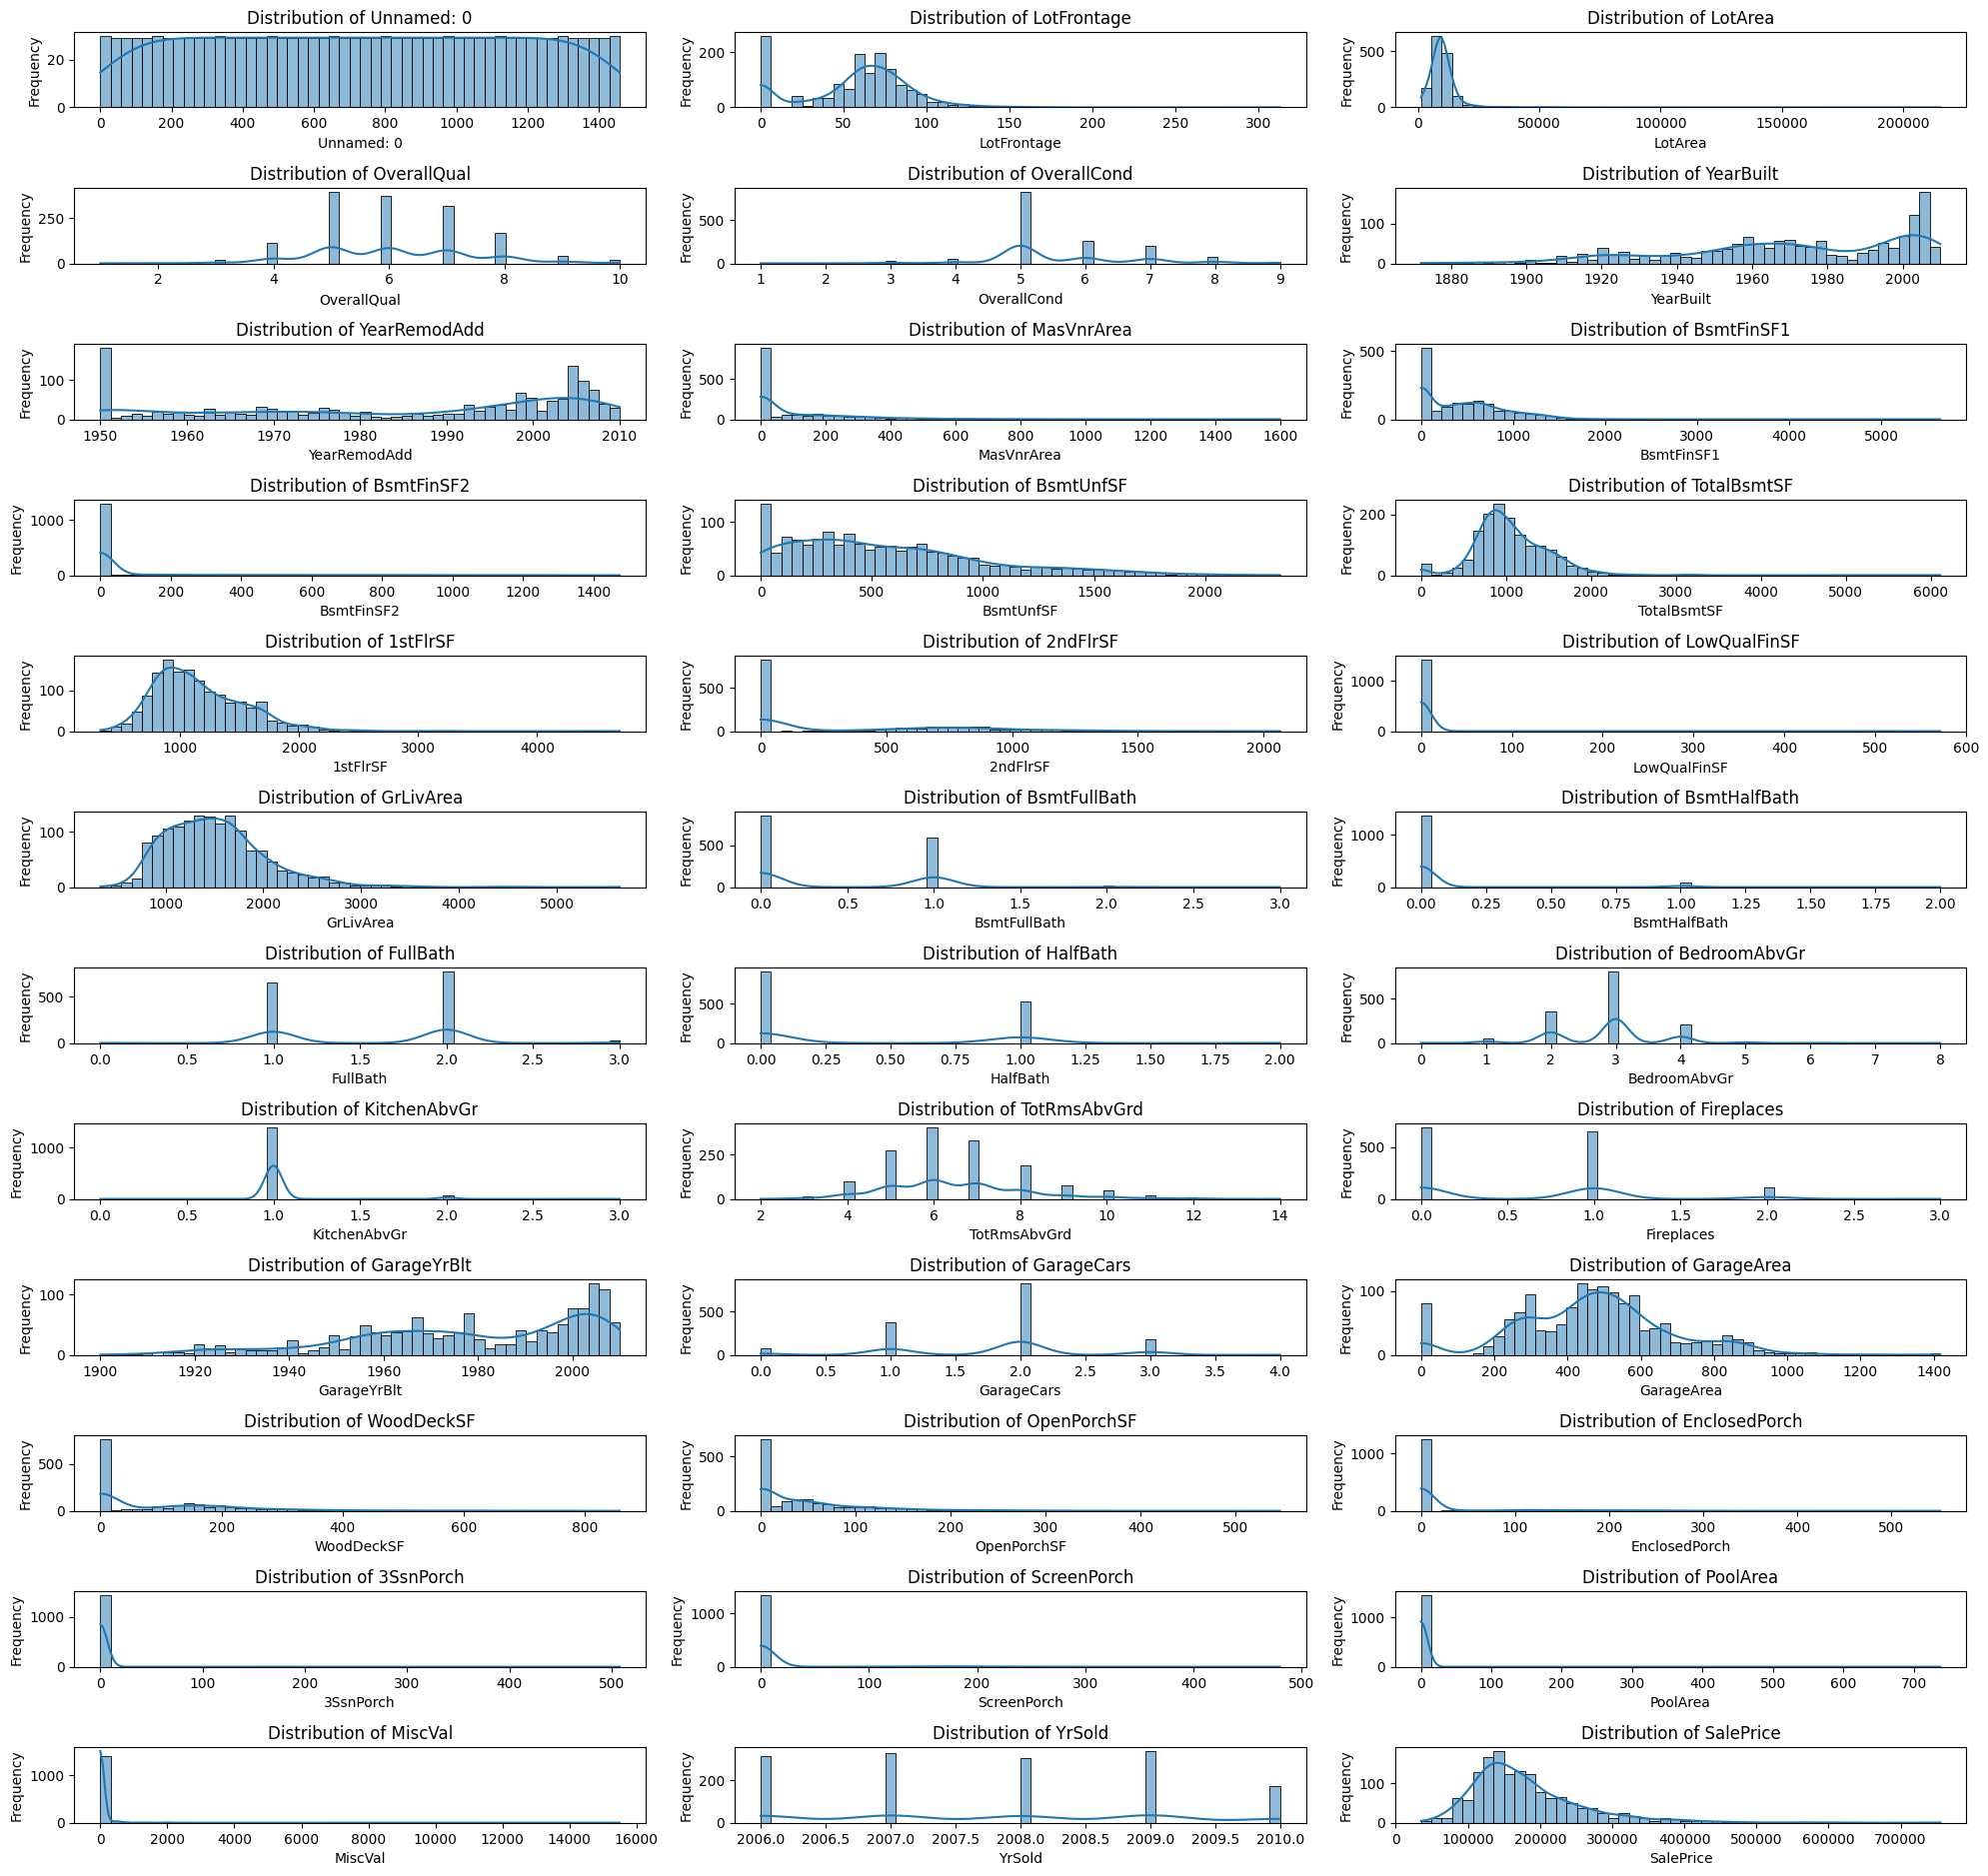

In [108]:
# Assuming df is your DataFrame
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Iterate over each numerical column and create a subplot for each
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Analyzing and Summarizing the Plots:**
- **1.LotFrontage:**
Distribution is relatively uniform, with slight peaks indicating most values are around the central range.
No significant skewness, suggesting a balanced distribution of lot frontages.
- **2.LotArea**: Right-skewed distribution with a long tail on the right. This suggests most lots are smaller, with fewer large lots.
High variance is indicated by the wide spread of the distribution.
- **3 .YrSold:**
Uniform distribution across the years, indicating consistent sales throughout the period.
No significant skewness or peaks, suggesting an even distribution of sales years.
- **4.SalePrice:**
Right-skewed distribution with a long tail, indicating a larger number of lower-priced homes and fewer high-priced ones.
Presence of high variance and potential outliers in the higher price range.

**Boxplot**
- **Boxplots for each numerical column in  dataset, providing a visual summary of the distribution, central tendency, and spread of the data for each variable.**

<ipython-input-109-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
<ipython-input-109-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
<ipython-input-109-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
<ipython-input-109-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `l

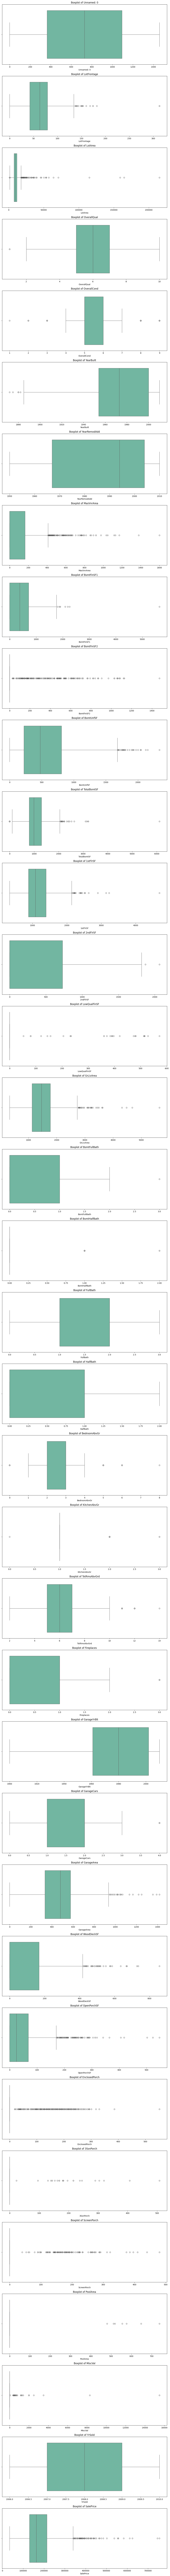

In [109]:
# Set up the figure with subplots
num_cols = len(df.select_dtypes(include=['int', 'float']).columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(12, 5*num_cols))

# Plot boxplot for each numerical column
for i, col in enumerate(df.select_dtypes(include=['int', 'float']).columns):
    sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

- **LotFrontage:**
Median and Quartiles: The box plot will show the median value and the interquartile range (IQR).
Outliers: Points outside the whiskers indicate outliers, which may suggest some properties have unusually large or small lot frontages.
- **LotArea:**
Distribution: Look for the spread of lot sizes. A wide box and whiskers indicate high variance.
Outliers: Properties with significantly large lot areas will appear as outliers, as indicated by points beyond the whiskers.
- **YrSold:**
Distribution: Check the spread of years in which properties were sold. This should generally be uniform if sales were consistent each year.
Outliers: Unusual sale years (if any) will be indicated as outliers.
- **SalePrice:**
Distribution: The box plot will show the central tendency and spread of sale prices.
Outliers: High sale prices will appear as outliers. Given the right-skewed nature of sale prices, expect many outliers on the higher end.

 **Probability Density Plots**
  - Probability Density Plots for each numerical column in dataset, providing a smooth estimate of the probability density function for each variable's distribution.

<ipython-input-110-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
<ipython-input-110-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
<ipython-input-110-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
<ipython-input-110-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col

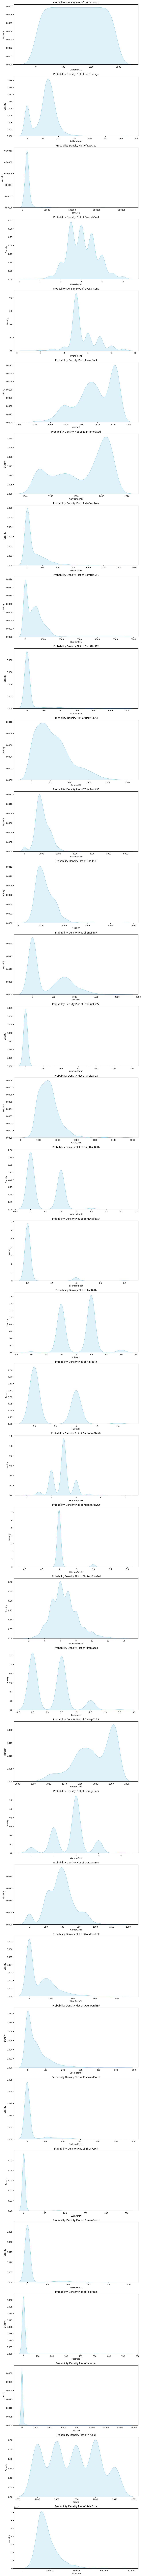

In [110]:
# Set up the figure with subplots
num_cols = len(df.select_dtypes(include=['int', 'float']).columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5*num_cols))

# Plot Probability Density Plot (Kernel Density Estimation) for each numerical column
for i, col in enumerate(df.select_dtypes(include=['int', 'float']).columns):
    sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
    axes[i].set_title(f'Probability Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


- **LotFrontage:** Likely to be approximately normally distributed but check for skewness and outliers.
- **LotArea**: Expected to be right-skewed with potential outliers in the higher range.
- **YrSold:** Should be relatively uniform if sales are consistent over the years.
- **SalePrice:** Expected to be right-skewed with a significant number of outliers on the higher end.


# **2. Data Visualization**

### **a. Univariate Analysis**: In Univariate analysis, plotting the right charts can help us better understand the data, which is why data visualization is so important. Matplotlib and Seaborn libraries are used in this post to visualize our data.

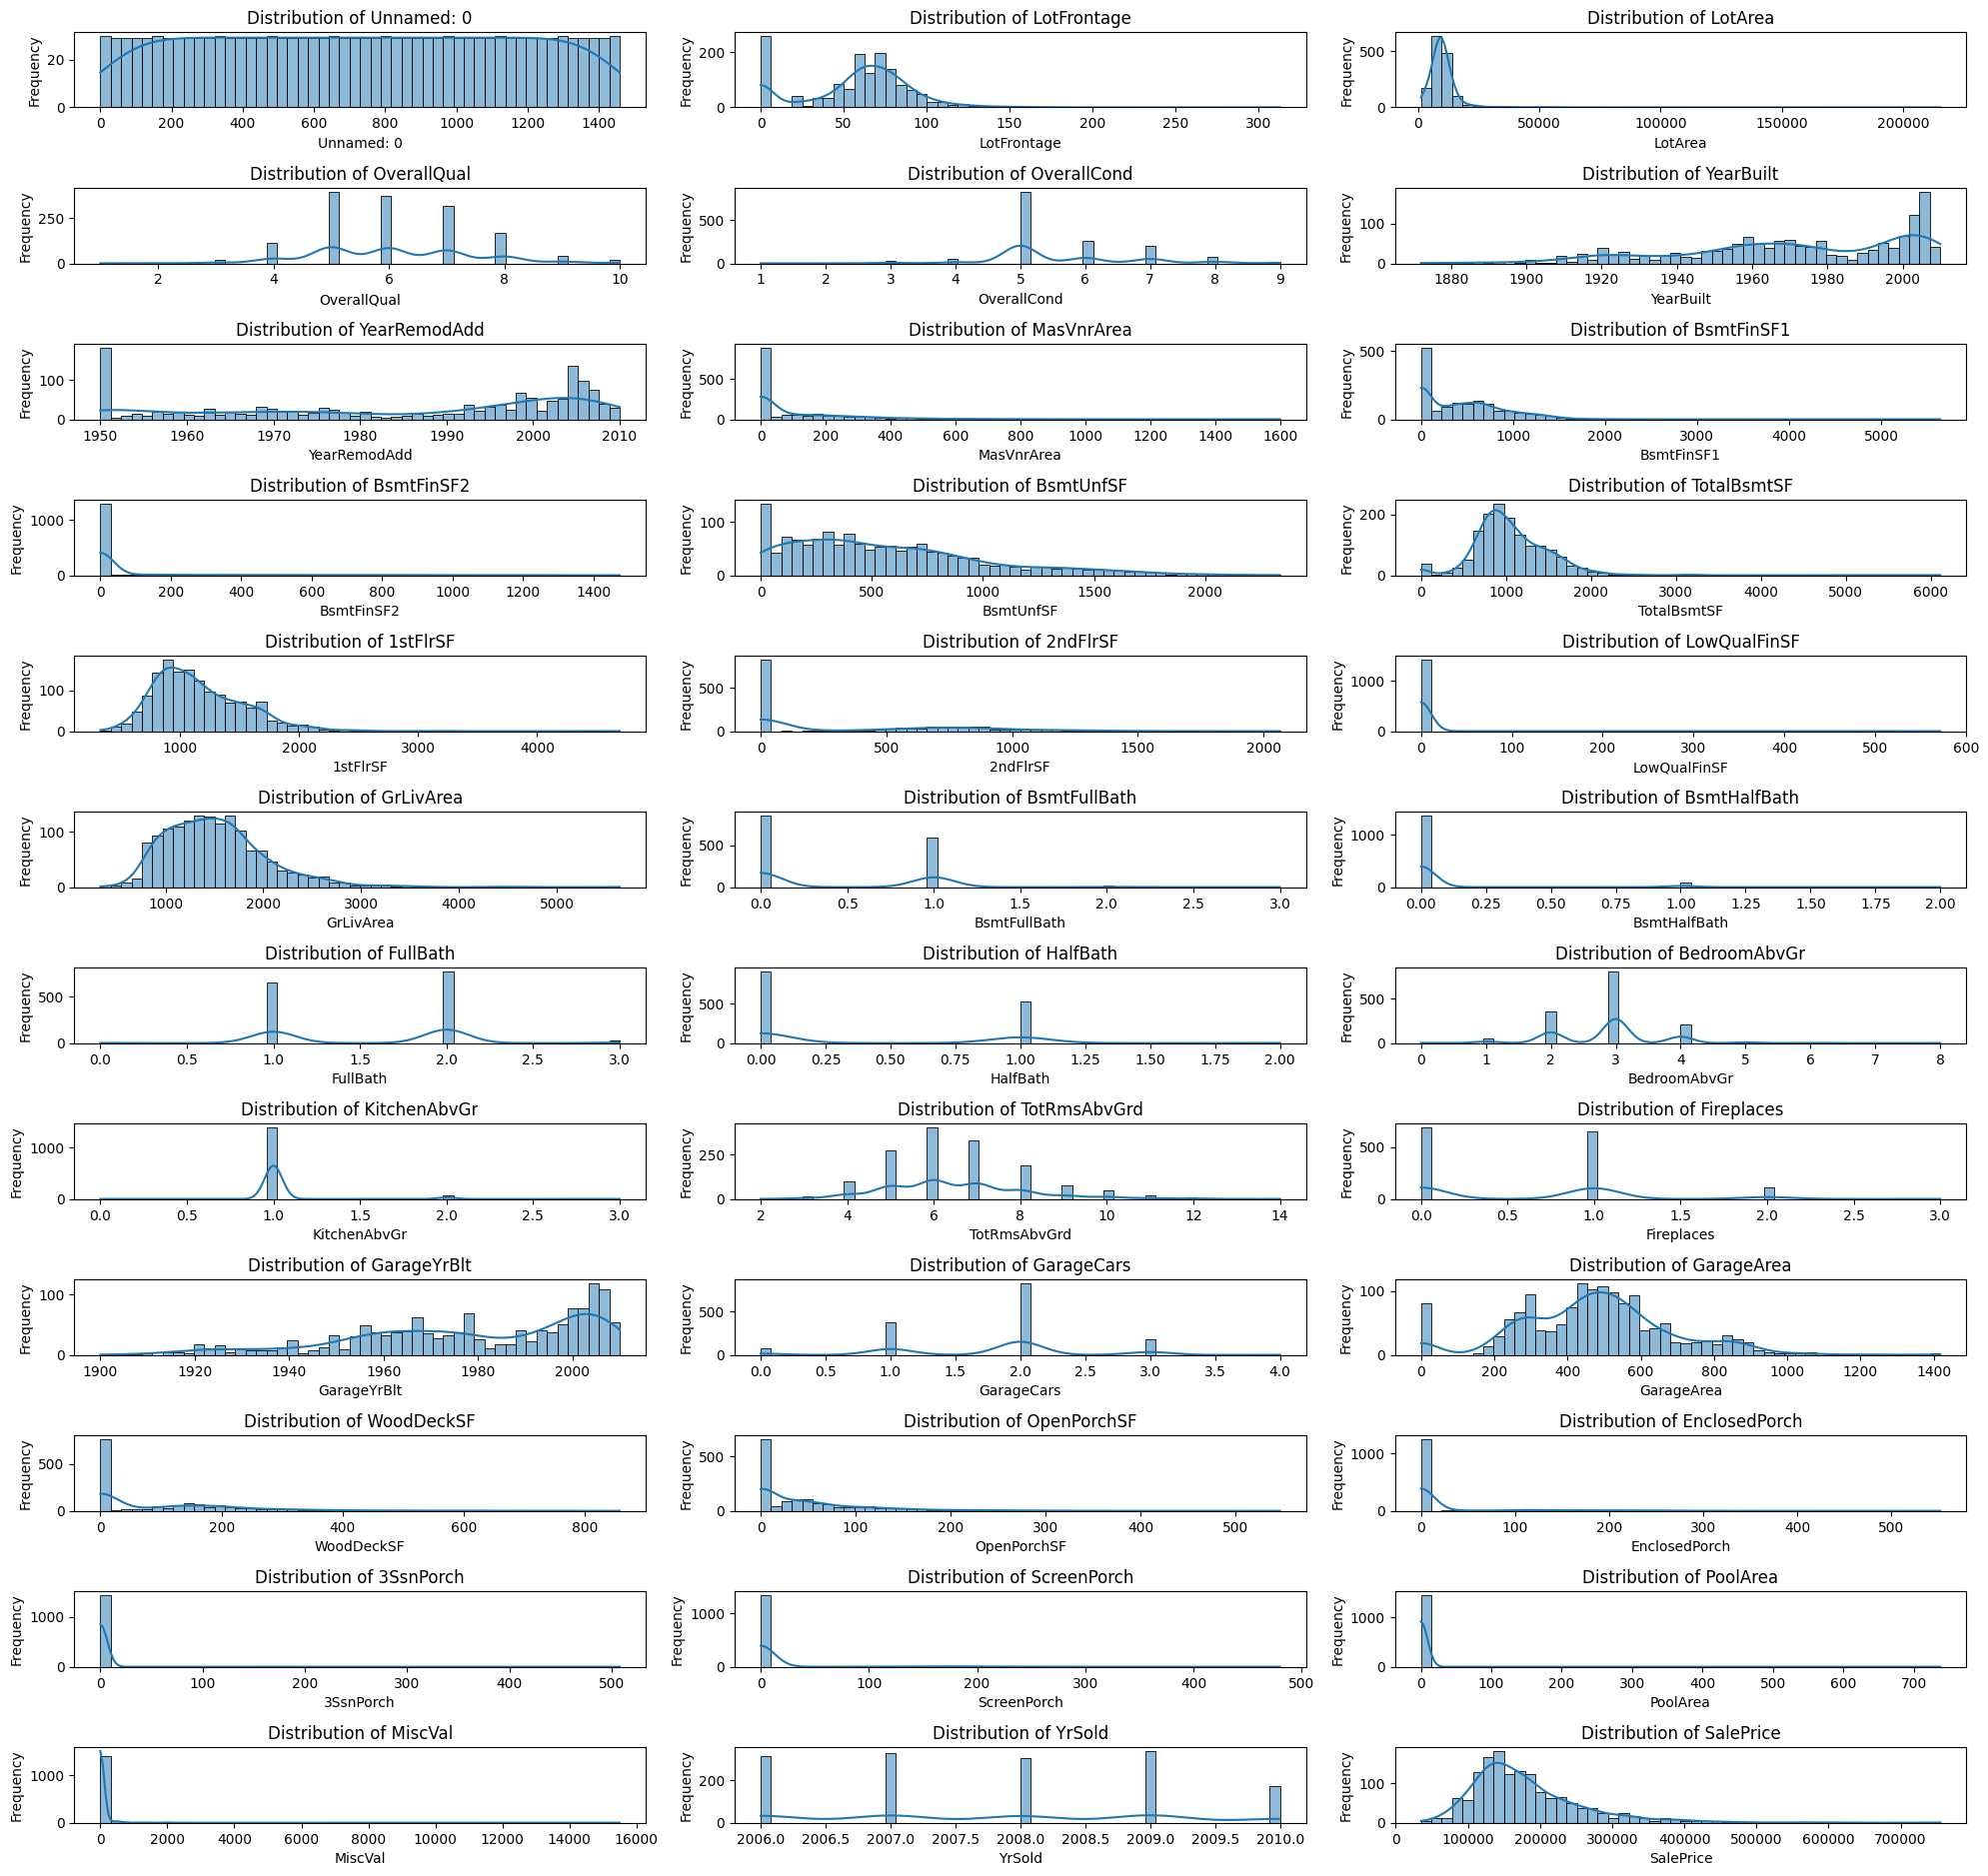

In [111]:
# Select only numeric columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Iterate over each numerical column and create a subplot for each
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Uniform Distributions:** Unnamed: 0 and YrSold show relatively uniform distributions.
- **Skewness and Outliers:** Features like LotArea and SalePrice are right-skewed with high variance and outliers.
- **Central Tendency:** The peaks of the distributions indicate the most common values for each feature.
- **Data Variability:** Wide distributions and long tails suggest features with high variance, which may require normalization or outlier handling.

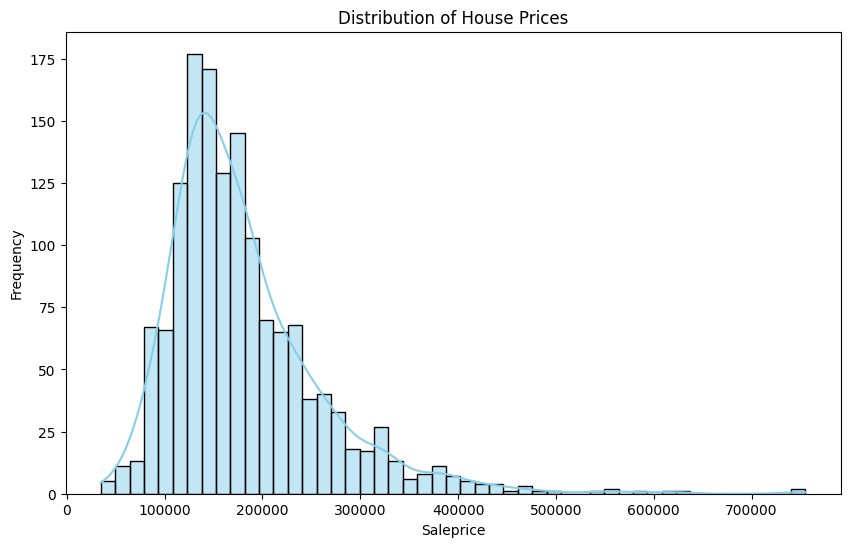

In [112]:
house_prices=df['SalePrice']
plt.figure(figsize=(10, 6))
sns.histplot(house_prices, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Saleprice')
plt.ylabel('Frequency')
plt.show()

- **Skewness:** The house prices are right-skewed, indicating more houses are sold at lower prices than at higher prices.
- **Central Tendency:** The peak of the distribution is at the lower price range, suggesting that the median house price is lower than the mean.
- **Variability:** There is high variability in house prices, as evidenced by the wide range of the distribution and the long tail.
- **Outliers:** The right tail of the distribution indicates the presence of high-priced houses, which are outliers relative to the rest of the data.

### **b. Bivariate Analysis**- Bivariate analysis allows for a thorough comprehension of the interdependence between two variables within a dataset by revealing information on the type and intensity of associations.

**Scatter plot**- Scatterplots are a fundamental graph type—much less complicated than histograms and boxplots.
- Identifying the relationship of 2 variables so we can understand the trends, patterns, and correlation


<Figure size 1600x1200 with 0 Axes>

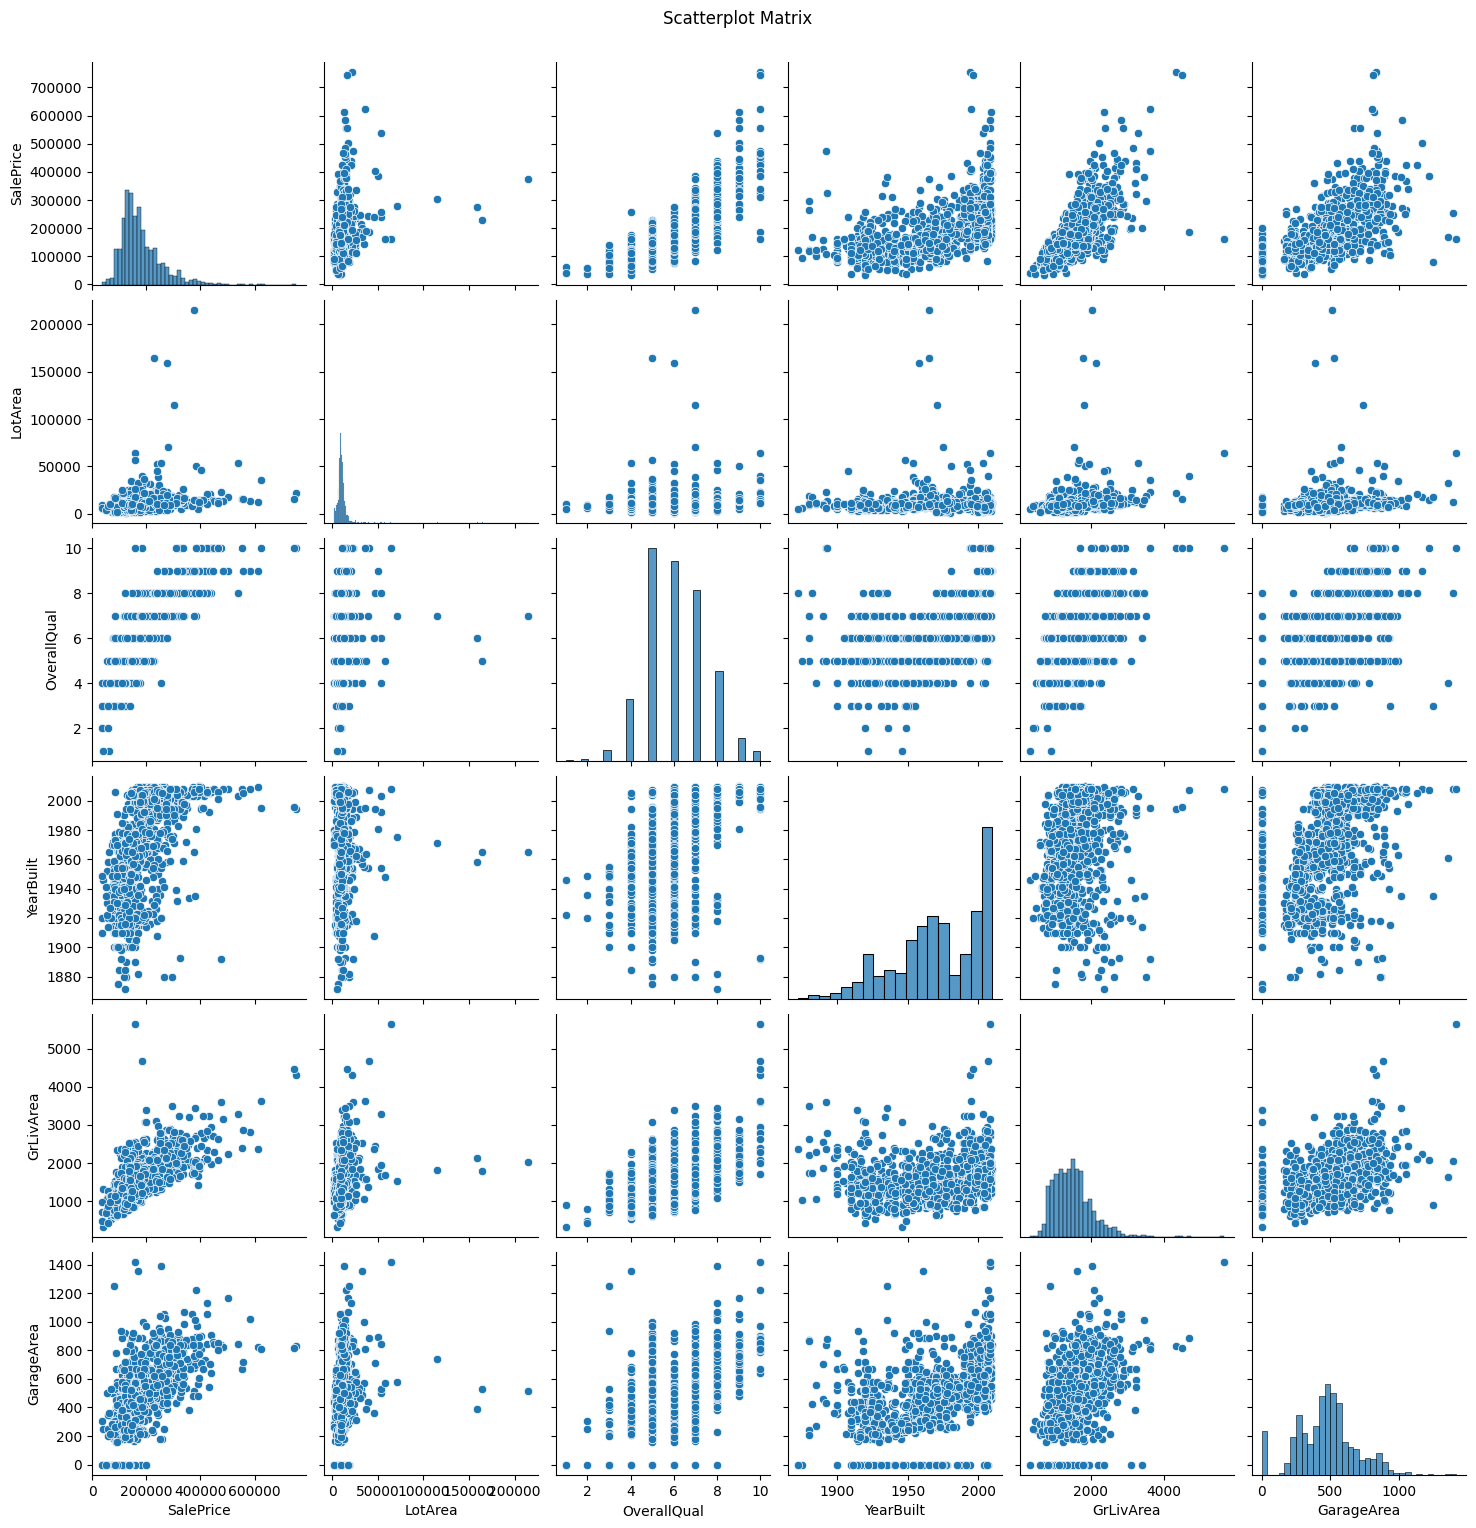

In [113]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))


# Select a subset of variables for pairplot
selected_columns = ['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageArea']
subset_data = df[selected_columns]

# Create the pairplot
sns.pairplot(subset_data)
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

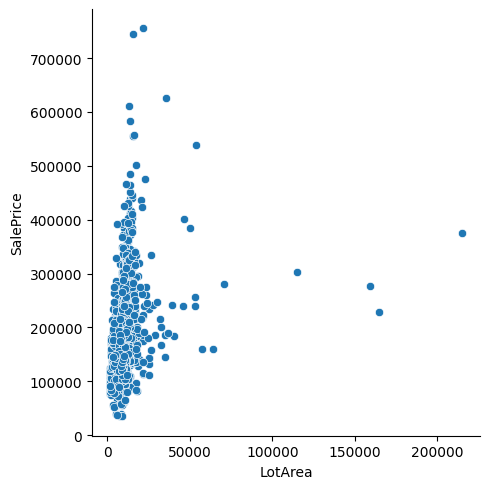

In [114]:
sns.relplot(df, x="LotArea", y="SalePrice")

**coefficient of correlation**

In [115]:
from scipy import stats
stats.pearsonr(df["SalePrice"], df["LotArea"])

PearsonRResult(statistic=0.26384335387140573, pvalue=1.1231391549186823e-24)

**Adding a best fit line**

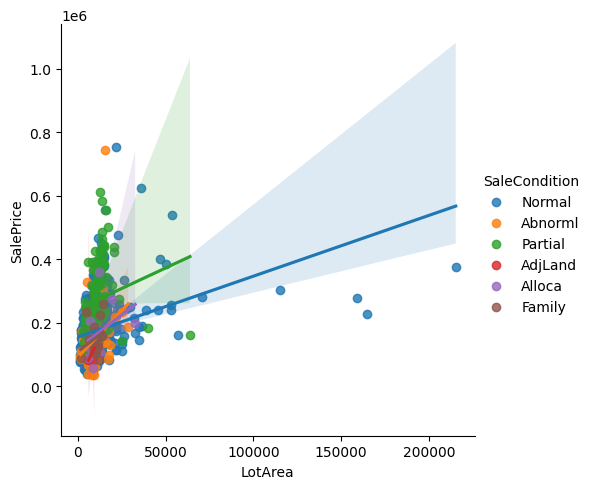

In [116]:
sns.lmplot( x="LotArea", y="SalePrice",hue="SaleCondition", data=df)

**Pairplot**-To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function.


- **c. Multivariate analysis**- Bivariate analysis allows for a thorough comprehension of the interdependence between two variables.

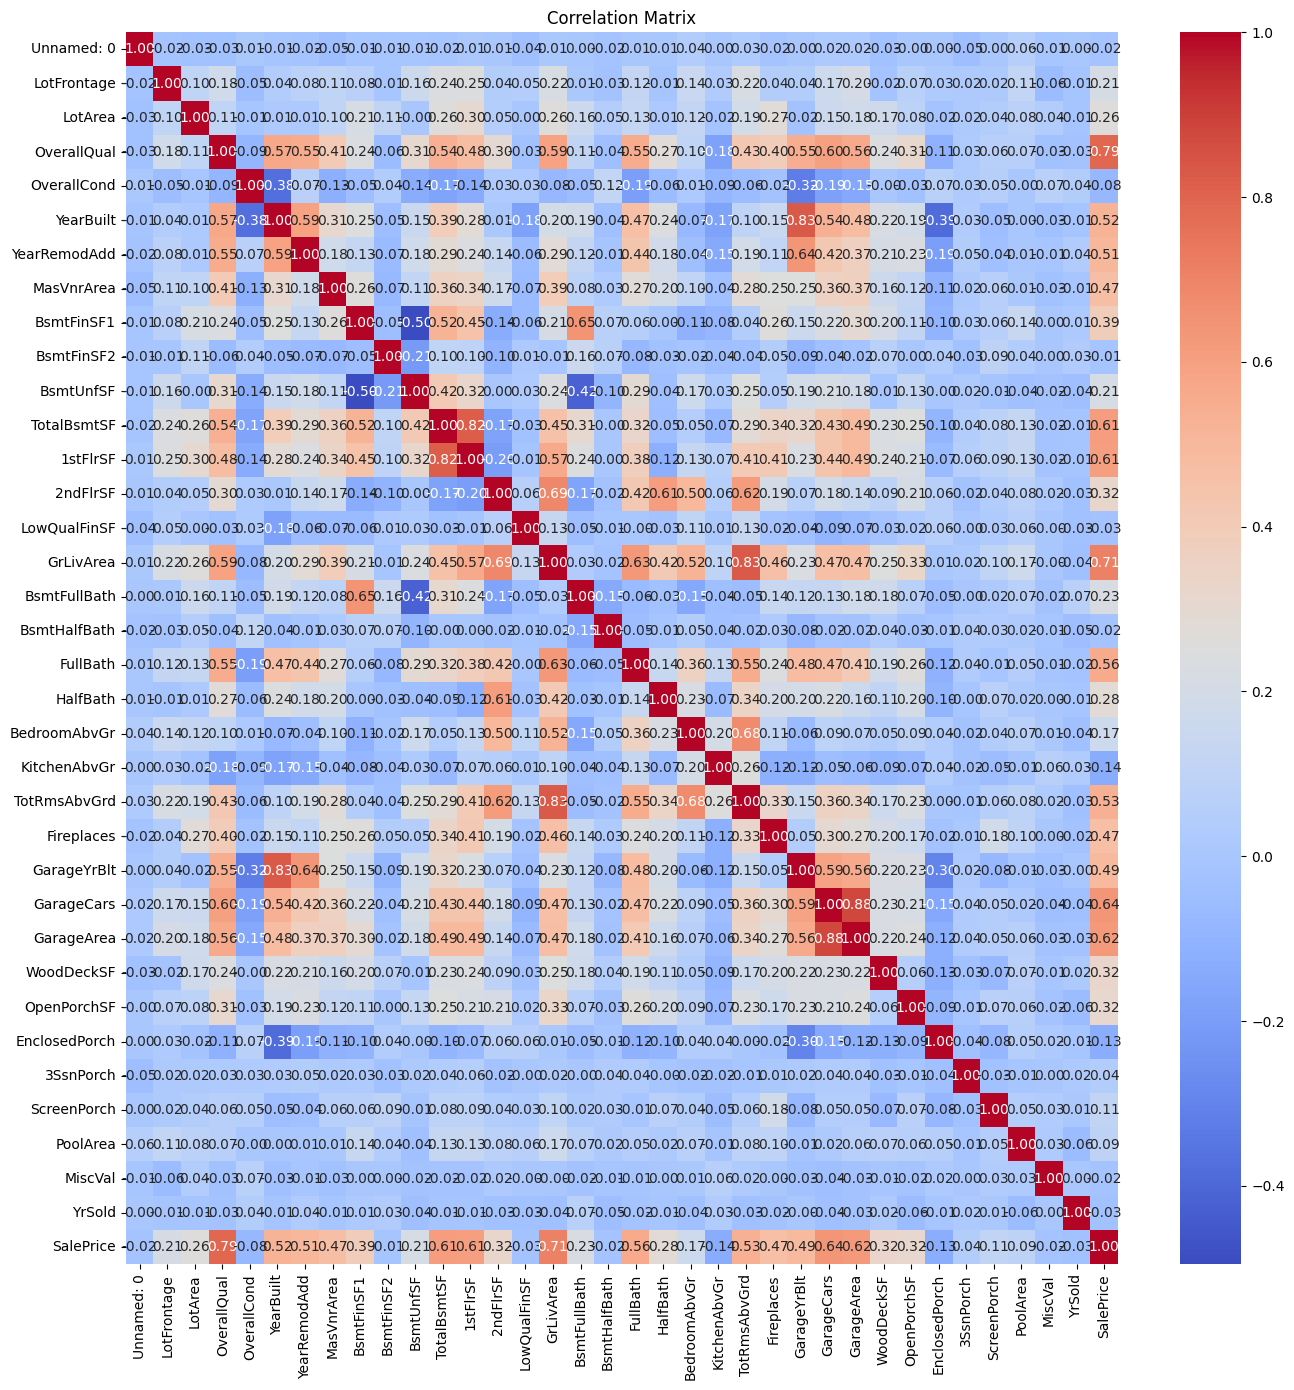

In [117]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])

# Compute the correlation matrix
corr_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap allows for quick visual identification of strong positive or negative correlations between pairs of variables. High positive correlation values (close to 1) indicate that when one variable increases, the other tends to increase as well, while high negative correlation values (close to -1) indicate that when one variable increases, the other tends to decrease.

# **2. Cleaning the Data:**


**Check for Duplicated Values**

In [118]:
df.duplicated().sum()

0

 **Over all null values**

In [119]:
df.isnull().sum().sum()

2323

 **No null values**

In [120]:
df.notnull().sum()

Unnamed: 0       1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [121]:
df.isnull().sum().sort_values(ascending = False)

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
                ... 
ExterQual          0
MasVnrArea         0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Length: 81, dtype: int64

**Check for Missing Values**

In [122]:
df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [123]:
df['Alley'].value_counts(dropna=False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

**This approach is useful for imputing missing values with a central tendency measure such as the mean, which helps to maintain the overall statistical properties of the data.**

In [125]:
# Calculate the mode of the "MasVnrType" column
mode_value1 = df["MasVnrType"].mode()[0]

# Fill missing values in the "MasVnrType" column with the mode value
df["MasVnrType"] = df["MasVnrType"].fillna(mode_value1)

In [127]:
df["MasVnrType"].isnull().sum()

0

In [128]:
df['Alley'].dtypes

dtype('O')

In [129]:
df['Alley'].isnull().sum()

1369

In [130]:
df['Electrical'].dtypes

dtype('O')

In [131]:
#mode_value2= df["Alley"].mode()[0]

# Fill missing values in the "Alley" column with the mode value
#df["Alley"] = df["Alley"].fillna(mode_value2,inplace=True)

In [132]:
# Assuming df is your DataFrame
# Remove the "Electrical" column permanently
df.drop("Electrical", axis=1, inplace=True)

In [133]:
# Remove the "Electrical" column permanently
df.drop("Alley", axis=1, inplace=True)

In [134]:
# Remove the "Electrical" column permanently
df.drop("Unnamed: 0", axis=1, inplace=True)

In [138]:
# Replace missing values in 'GarageYrBlt' column with mean
mean_GarageYrBlt = df['GarageYrBlt'].mean()
df['GarageYrBlt'].fillna(mean_GarageYrBlt, inplace=True)

In [139]:
#check if any missing values in dataframe
null_values_per_column = df.isnull().sum()
null_values_per_column
columns_with_null_values = null_values_per_column[null_values_per_column > 0]
columns_with_null_values

Series([], dtype: int64)

In [140]:
# Check for missing values
missing_values = df.isnull().sum()

# Summarize missing values
print("Missing Values Summary:")
print(missing_values)



Missing Values Summary:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64


In [141]:
# Check for missing values
missing_values = df.isnull().sum().sum()
missing_values

0

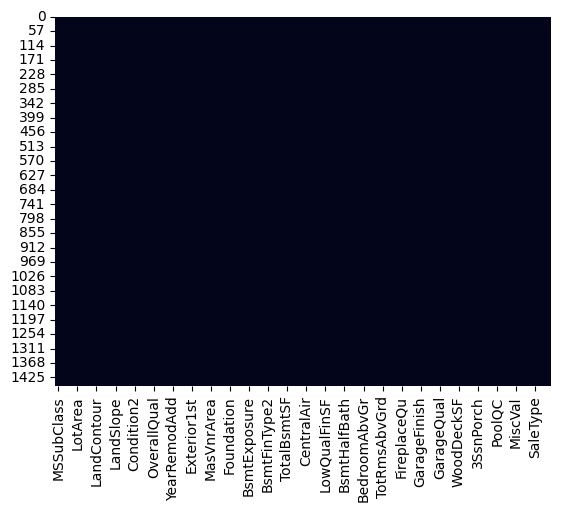

In [142]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [143]:
df.isnull().any().any()

False

**Check whether there are null values in columns**

In [144]:
# Check whether there are null values in columns
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

Series([], dtype: float64)


**work on central tendency**

In [145]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF

In [149]:
df.columns.value_counts().sum()

78

In [150]:
df.isnull().sum().sum()

0

In [151]:
columns_with_miss = df.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 0


Series([], dtype: int64)

# **Outliers**

In [152]:
# Get only numerical columns
numerical_columns = list(df.dtypes[df.dtypes == 'int64'].index)
len(numerical_columns)

34

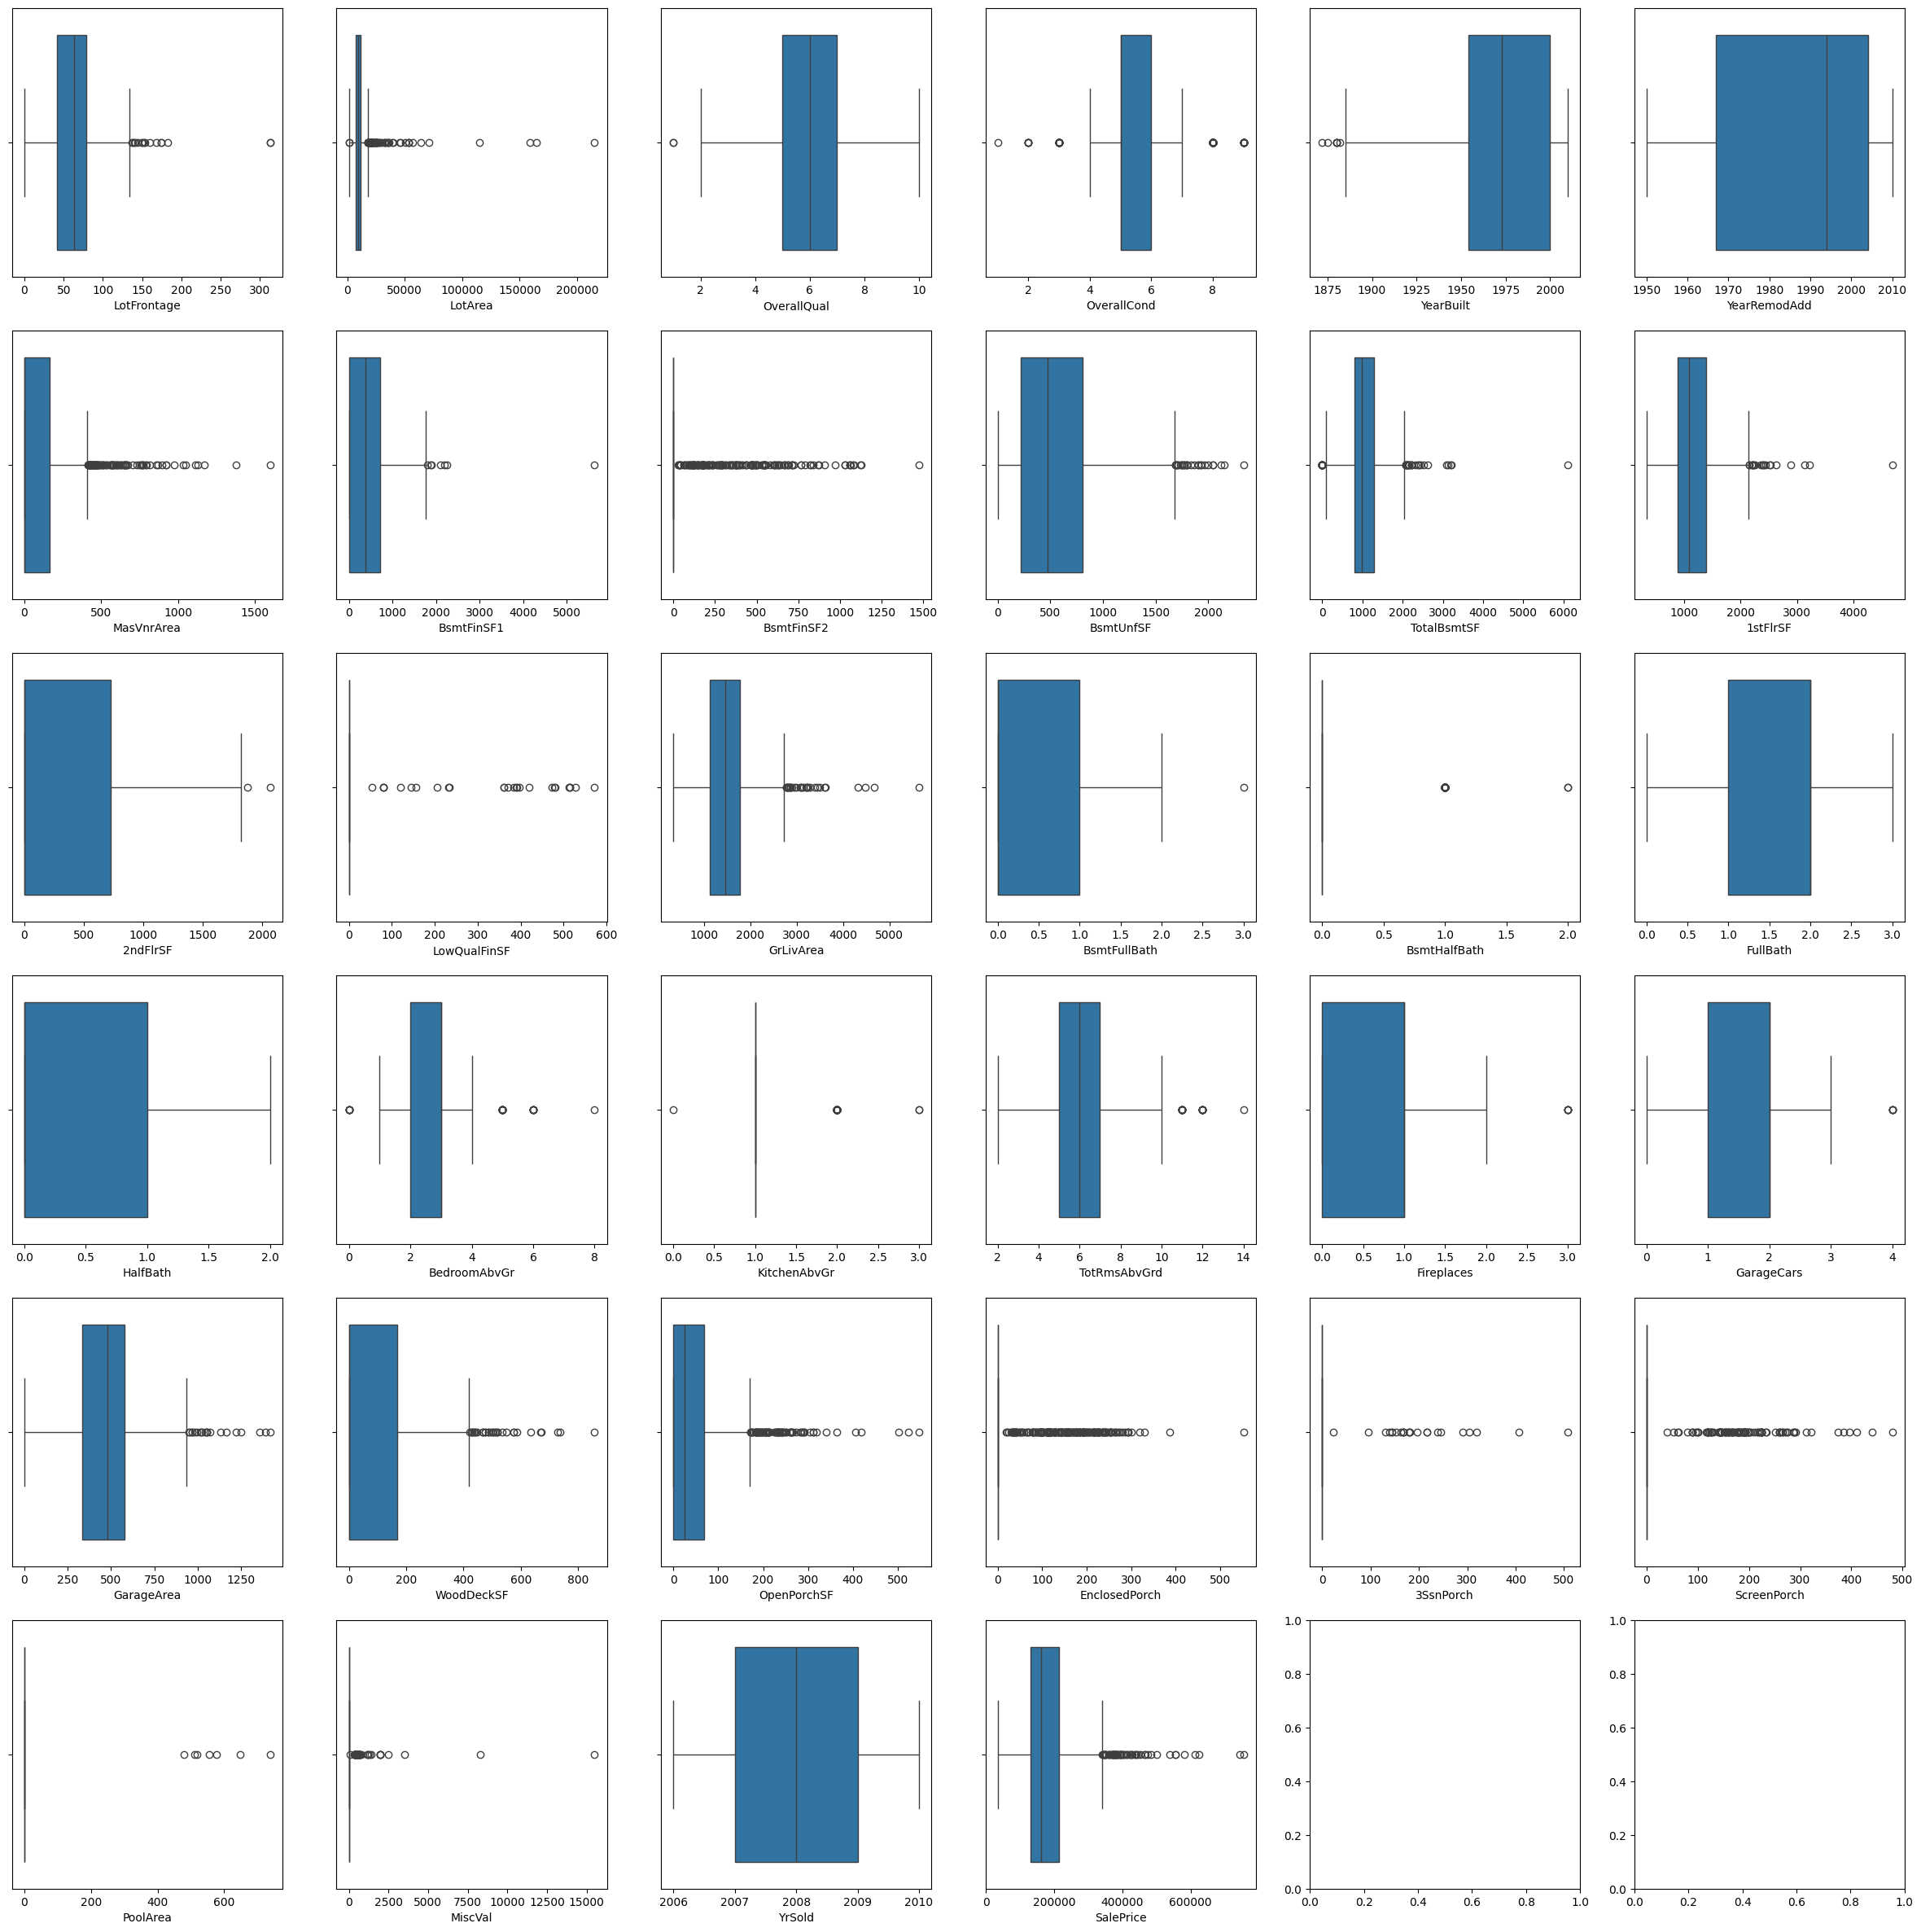

In [153]:
#  Create the plot grid
rows = 6
columns = 6

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[x, y])

    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

        plt.show()

In [154]:
outliers = {}  # Dictionary to store column names with outliers

for column in numerical_columns:
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Find outliers
    outlier_indices = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)].index

    if len(outlier_indices) > 0:
        outliers[column] = outlier_indices

# Print column names with outliers
print("Columns with potential outliers:")
for column, indices in outliers.items():
    print(f"{column}: {len(indices)} outliers")

Columns with potential outliers:
LotFrontage: 16 outliers
LotArea: 69 outliers
OverallQual: 2 outliers
OverallCond: 125 outliers
YearBuilt: 7 outliers
MasVnrArea: 98 outliers
BsmtFinSF1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 61 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
BsmtFullBath: 1 outliers
BsmtHalfBath: 82 outliers
BedroomAbvGr: 35 outliers
KitchenAbvGr: 68 outliers
TotRmsAbvGrd: 30 outliers
Fireplaces: 5 outliers
GarageCars: 5 outliers
GarageArea: 21 outliers
WoodDeckSF: 32 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
MiscVal: 52 outliers
SalePrice: 61 outliers


In [155]:
column_name=[
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

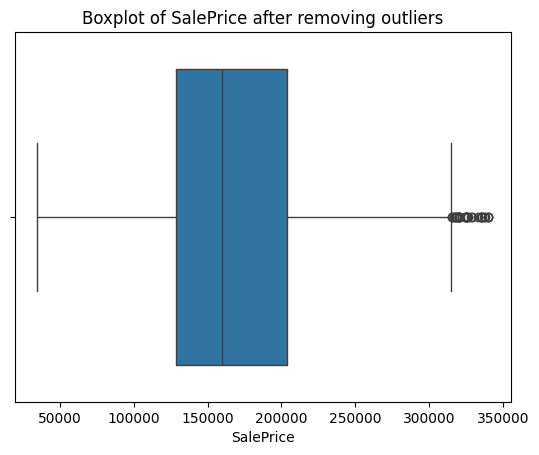

(1399, 78)

In [156]:
# Define the IQR technique function
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming 'Value' is the column we want to analyze for outliers
column_name = 'SalePrice'  # Replace with the actual column name you want to analyze

# Calculate the lower and upper range for the specified column
lower_range, upper_range = iqr_technique(df[column_name])

# Remove outliers from the dataframe
df_cleaned = df[(df[column_name] > lower_range) & (df[column_name] < upper_range)]

# Check that the outliers are removed
sns.boxplot(x = df_cleaned[column_name])
plt.title(f'Boxplot of {column_name} after removing outliers')
plt.show()

# Print the shape of the cleaned dataframe
df_cleaned.shape

In [157]:
# Check number of rows before and after outlier removal
original_rows = df.shape[0]
cleaned_rows = df_cleaned.shape[0]

if original_rows == cleaned_rows:
    print("No outliers have been removed.")
else:
    print(f"{original_rows - cleaned_rows} outliers have been removed.")

61 outliers have been removed.


In [158]:
# Function to remove outliers from a column using IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

# Dictionary to store information about removed outliers
removed_outliers_info = {}

# Iterate over each numerical column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Count rows before outlier removal
    rows_before = len(df)

    # Remove outliers from the column
    df[column] = remove_outliers(df[column])

    # Count rows after outlier removal
    rows_after = len(df)

    # Calculate number of outliers removed
    outliers_removed = rows_before - rows_after

    # Store information about removed outliers
    removed_outliers_info[column] = outliers_removed

# Display information about removed outliers
print("Outliers Removed:")
for column, removed_count in removed_outliers_info.items():
    print(f"{column}: {removed_count}")

Outliers Removed:
LotFrontage: 0
LotArea: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
MasVnrArea: 0
BsmtFinSF1: 0
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
TotRmsAbvGrd: 0
Fireplaces: 0
GarageYrBlt: 0
GarageCars: 0
GarageArea: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 0
MiscVal: 0
YrSold: 0
SalePrice: 0


<ipython-input-159-469e14750cab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color=('r'))


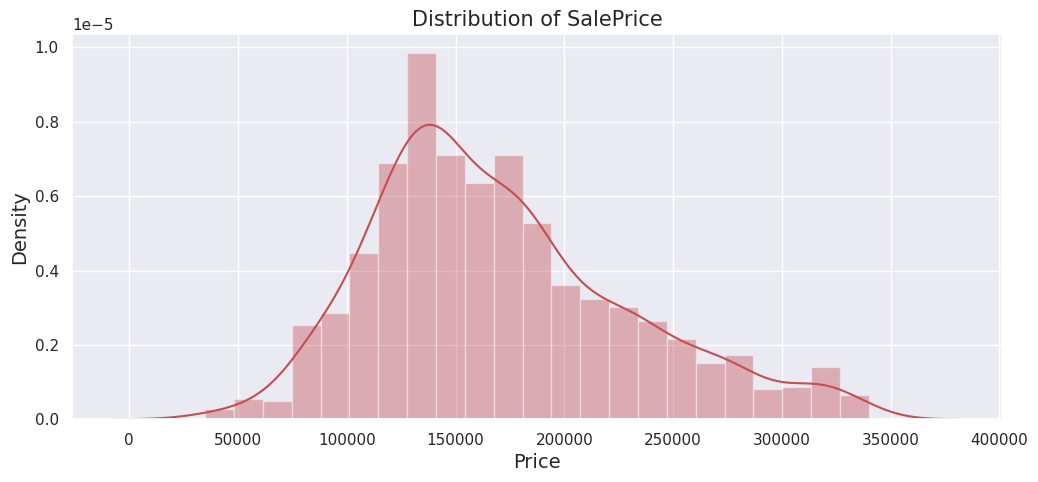

In [159]:
# Distribution of the prices
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df['SalePrice'], color=('r'))
plt.xlabel("Price", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of SalePrice", fontsize = 15)
plt.show()

In [160]:
# Count listings in each neighbourhood and store in pandas series
counts = df['SaleType'].value_counts()

# Reset the cindes of the series so that the neighbourhood groups become columns in the resulting dataframe
Top_SaleType_group = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_SaleType_group.columns = ['SaleType', 'SalePrice']

# Display the results
Top_SaleType_group

SaleType  SalePrice
0       WD       1267
1      New        122
2      COD         43
3    ConLD          9
4    ConLI          5
5    ConLw          5
6      CWD          4
7      Oth          3
8      Con          2

Text(0, 0.5, 'Total SalePrice')

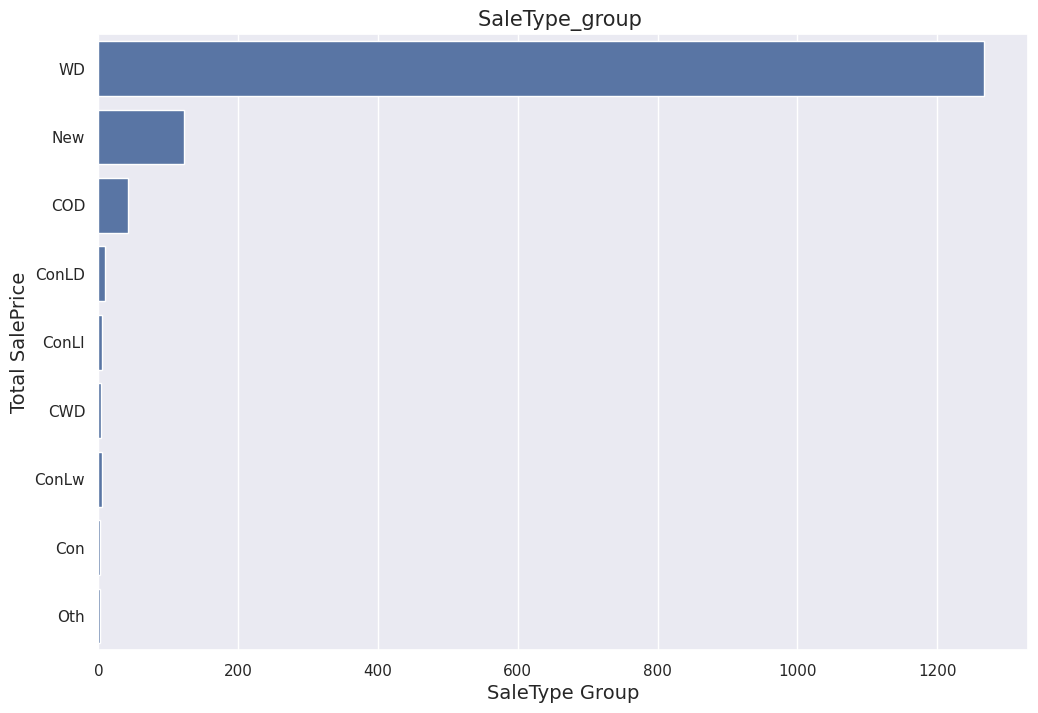

In [161]:
# Set the size
plt.figure(figsize = (12, 8))

#create a count plot of the neighbourhood group data
sns.countplot(df['SaleType'])

# Set title
plt.title('SaleType_group ', fontsize=15)

# Set the xlabel
plt.xlabel('SaleType Group', fontsize=14)

#Set the y label
plt.ylabel('Total SalePrice', fontsize=14)

In [163]:
# Group the  dataset by  SaleType_group and calculate the mean of each group
#grouped =df.groupby(SaleType_group").mean()
grouped = df.groupby("SaleType")["SalePrice"].mean()
# Reset the indes of the grouped data so that the neighbourhood group becomes a column
SaleType_avg_price = grouped.reset_index()

#Rename the Saleprice to 'avg_price'
SaleType_avg_price = round(SaleType_avg_price.rename(columns={"SalePrice": 'avg_price'}), 2)


# Select only the 'neighbourhood_group', and the avg_price
SaleType_avg_price[['SaleType', 'avg_price']].head()


SaleType  avg_price
0      COD  143973.26
1      CWD  210600.00
2      Con  269600.00
3    ConLD  138780.89
4    ConLI  137500.00

Text(0.5, 1.0, 'Average Price by the SaleType group')

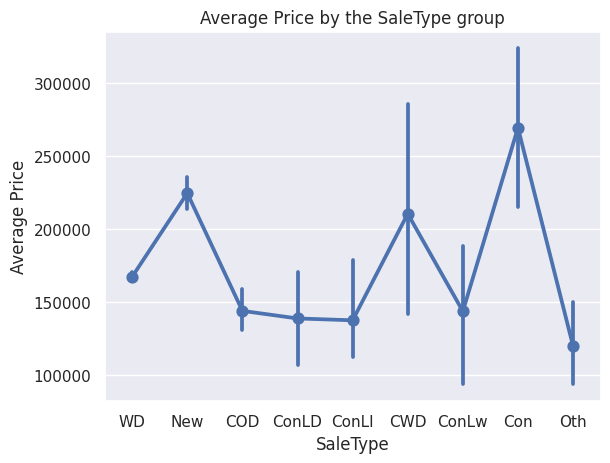

In [164]:
# Import mean from the statistics module
from statistics import mean

# Create the pointplot
sns.pointplot(x = 'SaleType', y = 'SalePrice', data=df, estimator=np.mean)

# Add axis and labels
plt.xlabel("SaleType")
plt.ylabel('Average Price')
plt.title('Average Price by the SaleType group')

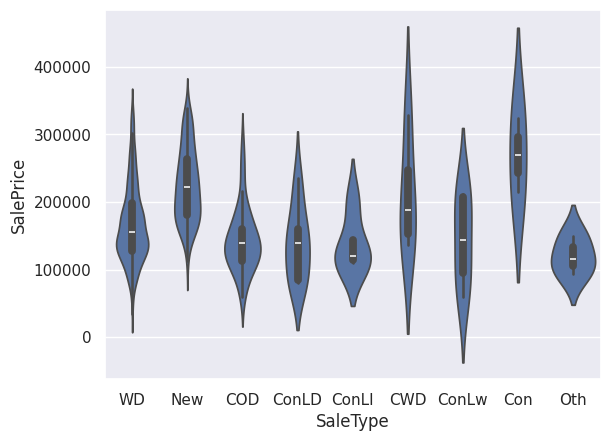

In [165]:
# Price distribution using violin plot
ax = sns.violinplot(x = 'SaleType', y = 'SalePrice', data =df)

# **Feature Enginnering**

**Interaction Features:**
- Interaction features involve combining two or more existing features to create new features that capture the interaction between them. These interactions can help improve the predictive power of a model by allowing it to capture more complex relationships between variables. Here's how you can create interaction features:

In [166]:
# List of numerical columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Interaction Features
interaction_df = pd.DataFrame(index=df.index)

# Example: Interaction between two numerical features
interaction_df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF']

# Example: Interaction between a numerical feature and a categorical feature
interaction_df['GarageCars_Quality'] = df['GarageCars'] * df['OverallQual']

# Add the interaction features to the original dataset
data = pd.concat([df, interaction_df], axis=1)

# Save the modified dataset
df.to_csv("data_with_interaction_features.csv", index=False)

**Label Encoding**:
- Convert categorical variables into numerical labels. This is useful for algorithms that can handle numerical inputs but not categorical inputs.

In [172]:
cf=df.select_dtypes(include=['object']).columns.to_list()

In [201]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to each categorical column
for col in cf:
    label_encoder = LabelEncoder()
    encoded_data = label_encoder.fit_transform(df[col])

# Save the modified dataset
df.to_csv("encoded_housing_data.csv", index=False)

In [174]:
label_encoder

LabelEncoder()

**Feature Scaling:**
- Scale numerical features to a similar range, such as min-max scaling or standardization (z-score scaling). This helps algorithms that are sensitive to the scale of features, such as gradient descent-based algorithms.

In [175]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# List of numerical columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Min-Max scaling
min_max_scaler = MinMaxScaler()
df[num_cols] = min_max_scaler.fit_transform(df[num_cols])

# Standardization (z-score scaling)
standard_scaler = StandardScaler()
df[num_cols] = standard_scaler.fit_transform(df[num_cols])

# Save the modified dataset
df.to_csv("scaled_housing_data.csv", index=False)

**Binning/Discretization:**
- Group numerical features into bins or categories. This can help capture non-linear relationships and reduce the impact of outliers.

In [176]:
from sklearn.preprocessing import KBinsDiscretizer

# Drop non-numeric columns
numeric_data = df.select_dtypes(include=['int', 'float'])

# Define the number of bins for each numerical feature
n_bins = 5  # You can adjust this parameter as needed

# Initialize the KBinsDiscretizer
kbins_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Apply binning to numerical features
binned_features = kbins_discretizer.fit_transform(numeric_data)

# Create DataFrame for binned features
binned_df = pd.DataFrame(binned_features, columns=[f'{col}_binned' for col in numeric_data.columns])

# Add binned features to the original dataset
df = pd.concat([df, binned_df], axis=1)

# Save the modified dataset
df.to_csv("data_with_binned_features.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

### Feature Selection:
- Select a subset of the most important features using techniques like feature importance scores, correlation analysis, or model-based selection.

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Split features and target variable
X = df.drop(columns=["SalePrice"])  # Features
y = df["SalePrice"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Feature Importance Scores (Random Forest example)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Select features with importance scores greater than the mean importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
selected_features = feature_importances[feature_importances > feature_importances.mean()].index.tolist()

# 2. Correlation Analysis
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)
selected_features_correlation = correlation_with_target[correlation_with_target > 0.5].index.tolist()

# 3. Model-Based Selection (Random Forest example)
selector = SelectFromModel(estimator=rf, threshold='mean')
selector.fit(X_train, y_train)

selected_features_model_based = X_train.columns[selector.get_support()].tolist()

# Compare selected features from different methods
print("Selected features based on feature importance scores:", selected_features)
print("Selected features based on correlation analysis:", selected_features_correlation)
print("Selected features based on model-based selection:", selected_features_model_based)

Selected features based on feature importance scores: ['OverallQual', 'GrLivArea', 'SalePrice_binned']
Selected features based on correlation analysis: ['SalePrice', 'SalePrice_binned', 'OverallQual', 'OverallQual_binned', 'GrLivArea', 'GrLivArea_binned', 'GarageCars', 'GarageArea', 'GarageArea_binned', 'YearBuilt_binned', 'FullBath_binned', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'GarageCars_binned', 'TotalBsmtSF', 'YearRemodAdd_binned', 'TotalBsmtSF_binned', '1stFlrSF']
Selected features based on model-based selection: ['OverallQual', 'GrLivArea', 'SalePrice_binned']


**Feature Extraction:**
- Extract information from existing features to create new ones. This could involve dimensionality reduction techniques like Principal Component Analysis (PCA) or extracting information from text or images.

In [178]:
from sklearn.decomposition import PCA
# Split features and target variable
X = df.drop(columns=["SalePrice"])  # Features
y = df["SalePrice"]  # Target variable

# Preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature extraction using PCA
n_components = 10  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Combine PCA components with target variable for further analysis if needed
pca_train_df = pd.DataFrame(X_pca_train, columns=[f"PC{i+1}" for i in range(n_components)])
pca_train_df["SalePrice"] = y_train.values

# Save the PCA components for future use
pca_train_df.to_csv("pca_components.csv", index=False)

Explained variance ratio: [0.15558242 0.06444145 0.05119981 0.04200416 0.03203681 0.03076089
 0.02273198 0.02066171 0.01978782 0.01911736]


**Temporal Features:**
 Extract information from time-related variables, such as day of the week, month, or year.


In [179]:
# Extract temporal features
df['MoSold'] = df['MoSold'].astype(str).str.zfill(2)  # Pad with leading zeros for consistency
df['DateSold'] = df['YrSold'].astype(str) + '-' + df['MoSold'] + '-01'  # Assume 1st day of the month

# Check the first few values in the DateSold column
print(df['DateSold'].head())

# Convert the DateSold column to datetime format
# Modify the format string if necessary
try:
    df['DateSold'] = pd.to_datetime(df['DateSold'], format='%Y-%m-%d')
except ValueError:
    # Handle invalid values or use a different conversion function
    # ...
    pass



0     0.1387774889497577--0.7908686164966601-01
1     -0.6144386220786668-0.8110572715237666-01
2      0.1387774889497577-1.7722128043360224-01
3    -1.3676547331070914--0.7908686164966601-01
4     0.1387774889497577--1.1112537941007452-01
Name: DateSold, dtype: object


**Log transformation:**
- Log transformation can help make the distribution of variables more symmetric and improve the performance of certain machine learning algorithms, especially those that assume normally distributed data.








In [180]:
# Select the numerical variables you want to log-transform
# List of numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]


# Log transformation
df[numerical_cols] = np.log1p(df[numerical_cols])

# Save the modified dataset
df.to_csv("log_transformed_housing_data.csv", index=False)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


**Understanding the relationships**
1. **Strength of Correlation:** The intensity of the colors in the heatmap represents the strength of the correlation between variables. Darker shades indicate stronger correlations, while lighter shades indicate weaker correlations.
2. **Direction of Correlation:** Colors closer to red represent positive correlations, meaning that as one variable increases, the other variable tends to increase as well. On the other hand, colors closer to blue represent negative correlations, indicating that as one variable increases, the other variable tends to decrease.
3.I**dentifying Patterns:** Look for clusters of variables with similar colors in the heatmap. This can indicate groups of variables that are strongly correlated with each other. For example, in a housing dataset, variables related to the size of the property.
4. **Outliers:** Pay attention to outliers or unexpected patterns in the heatmap. These may indicate errors in the data or unusual relationships between variables that warrant further investigation.
5.**Non-Linear Relationships:** Keep in mind that correlation coefficients only capture linear relationships between variables. Non-linear relationships may not be fully captured by the correlation matrix.
6. **Multicollinearity:** High correlations between independent variables (features) can indicate multicollinearity, which can lead to instability in regression models and inflated standard errors. Consider addressing multicollinearity through feature selection or regularization techniques.
7. **Domain Knowledge**: Interpret the correlations in the context of the problem domain and existing knowledge about the variables. Some relationships may be expected based on domain expertise, while others may be surprising and warrant deeper investigation.
**Overall, correlation matrix heatmaps provide a valuable visual tool for understanding the relationships between variables in a dataset and can guide further analysis, feature selection, and model building processes.**

In [187]:
# Example 1: Group by a single variable and calculate mean
mean_price_by_neighborhood = df.groupby('Neighborhood')['SalePrice'].mean()
print("Mean Sale Price by Neighborhood:")
mean_price_by_neighborhood

# Example 2: Group by multiple variables and calculate median
median_price_by_neighborhood_and_year = df.groupby(['Neighborhood', 'YearBuilt'])['SalePrice'].median()
print("\nMedian Sale Price by Neighborhood and Year Built:")
median_price_by_neighborhood_and_year

# Example 3: Perform multiple aggregations using agg() function
aggregations_by_neighborhood = df.groupby('Neighborhood').agg({'SalePrice': ['mean', 'median', 'std']})
print("\nAggregations by Neighborhood:")
aggregations_by_neighborhood

Mean Sale Price by Neighborhood:

Median Sale Price by Neighborhood and Year Built:

Aggregations by Neighborhood:


SalePrice                    
                  mean    median       std
Neighborhood                              
-2.067739    -0.905358 -0.752051  1.138939
-1.228216     0.238873  0.170332  0.331320
-0.778362    -1.351567 -1.424140  0.850181
-0.469203    -1.398790 -1.190600  0.998044
-0.233392    -0.505895 -0.260619  0.970387
-0.042713    -0.667998 -0.630711  0.785940
 0.117365    -0.698777 -0.541591  0.371289
 0.255318     0.201909  0.212256  0.454335
 0.376527     0.770427  0.949045  0.511585
 0.484620     0.560518  0.496475  0.532639
 0.582160    -1.139927 -0.961223  1.229854
 0.671026    -0.678117 -0.737517  0.843013
 0.752636    -0.783733 -0.822598  0.545203
 0.828085     0.073025  0.225531  0.845866
 0.898238     0.504038  0.610096  0.505153
 0.963791     0.455795  0.280452  0.471752
 1.025310     0.554099  0.595567  0.516474
 1.083262     0.491814  0.343587  0.512191

**Cross-tabulation, or crosstab, is a method to compute a frequency table of the variables involved. It is used to summarize the relationship between two categorical variables. **

In [188]:
# Example 1: Cross-tabulation between two categorical variables
cross_tab = pd.crosstab(df['Neighborhood'], df['SaleCondition'])
print("Cross-tabulation between Neighborhood and SaleCondition:")
cross_tab

# Example 2: Cross-tabulation with margins (totals)
cross_tab_with_margins = pd.crosstab(df['Neighborhood'], df['SaleCondition'], margins=True)
print("\nCross-tabulation with margins:")
cross_tab_with_margins

Cross-tabulation between Neighborhood and SaleCondition:

Cross-tabulation with margins:


SaleCondition         -1.2046206251949714  0.18938182244282178  \
Neighborhood                                                     
-2.0677386945963487                     0                   82   
-1.2282161929835083                     2                   64   
-0.7783621562232996                     0                   29   
-0.4692032915287171                     0                   16   
-0.23339163566741844                    2                   42   
-0.04271296247195237                    4                  198   
0.11736461339831682                     0                    8   
0.2553182385057406                      3                   64   
0.37652731874924356                     0                   37   
0.4846202438882925                      0                   45   
0.5821604914813979                      4                   94   
0.6710264668356692                      0                   22   
0.7526357680111284                      1                   67   
0.82808458400458                        0                   50   
0.8982380676561629                      0                   49   
0.9637910206341895                      0                   16   
1.0253098755741723                      0                   28   
1.0832624925435392                      0                   11   
All                                    16                  922   

SaleCondition         0.7500939313988175   All  
Neighborhood                                    
-2.0677386945963487                    4    86  
-1.2282161929835083                   12    78  
-0.7783621562232996                    0    29  
-0.4692032915287171                    0    16  
-0.23339163566741844                   1    45  
-0.04271296247195237                   0   202  
0.11736461339831682                    0     8  
0.2553182385057406                     0    67  
0.37652731874924356                    0    37  
0.4846202438882925                    32    77  
0.5821604914813979                     2   100  
0.6710264668356692                     0    22  
0.7526357680111284                     0    68  
0.82808458400458                       1    51  
0.8982380676561629                    33    82  
0.9637910206341895                     8    24  
1.0253098755741723                     7    35  
1.0832624925435392                     0    11  
All                                  100  1038

# **Statistical Testing:**

**Hypothesis test**
- Statistical hypothesis testing is a method used to make inferences about a population based on sample data. It involves formulating two competing hypotheses, the null hypothesis (H0) and the alternative hypothesis (H1), and using sample data to determine which hypothesis is supported by the evidence.

In [189]:
from scipy import stats
# Conducting a hypothesis test to compare the mean sale price of houses in two neighborhoods

# Select data for two neighborhoods
neighborhood1_df = df[df['Neighborhood'] == 'Neighborhood1']['SalePrice']
neighborhood2_df = df[df['Neighborhood'] == 'Neighborhood2']['SalePrice']

# Assume significance level alpha = 0.05

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(neighborhood1_df, neighborhood2_df)

# Compare the p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in mean sale prices between the two neighborhoods.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in mean sale prices between the two neighborhoods.")


Fail to reject the null hypothesis (H0): There is no significant difference in mean sale prices between the two neighborhoods.


Descriptive Statistics:
Mean: 48.96153482605907
Median: 48.73043708220287
Mode: 23.802548959102555
Standard Deviation: 9.036161766446297
Variance: 81.65221946938584
Range: 44.72023288598683

Inferential Statistics:
T-statistic: -1.1434720057588346
P-value: 0.2556001762530408
Fail to reject null hypothesis (non-significant result)


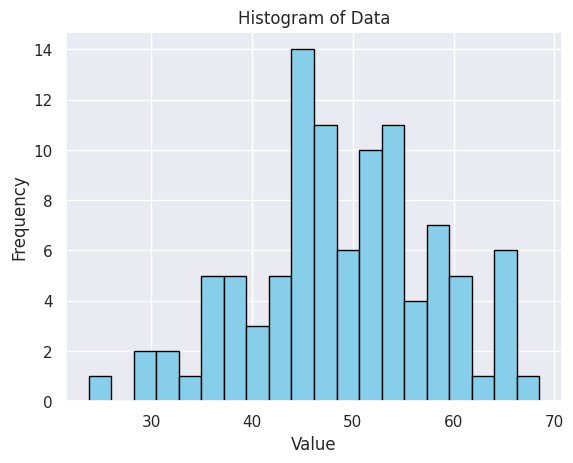

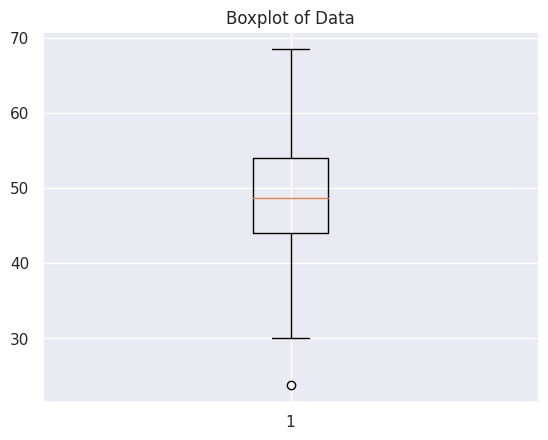

In [190]:
# Generate a random dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# Descriptive statistics
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)[0]
std_dev = np.std(data)
variance = np.var(data)
range_data = np.max(data) - np.min(data)

print("Descriptive Statistics:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_data}")

# Inferential statistics (hypothesis testing)
t_statistic, p_value = stats.ttest_1samp(data, popmean=50)
print("\nInferential Statistics:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis (significant result)")
else:
    print("Fail to reject null hypothesis (non-significant result)")

# Data visualization
import matplotlib.pyplot as plt

# Histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.boxplot(data)
plt.title('Boxplot of Data')
plt.show()

**Interactive Exploration**

Interactive Dashboads, - Plotly, tableau, streamlit
Widgets, and filters

**Plotly**:
- Plotly is a Python graphing library that makes it easy to create interactive visualizations. It offers a wide range of chart types, including scatter plots, line charts, bar charts, and more. Plotly's interactive features allow users to zoom, pan, and hover over data points to view details.

In [191]:
import plotly.express as px
# Create an interactive scatter plot with Plotly Express
fig = px.scatter(df, x="GrLivArea", y="SalePrice", color="Neighborhood", hover_data=['YearBuilt', 'SaleCondition'])
fig.show()

**Streamlit:**

*   List item
*   List item


 - Streamlit is an open-source Python library that makes it easy to create web apps for machine learning, data analysis, and more. With Streamlit, you can build interactive dashboards using simple Python scripts. It provides widgets for user input, such as sliders, dropdowns, and text inputs, making it easy to create interactive elements in your dashboard.

In [277]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [280]:
#Identify and separate numerical and categorical columns
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])

In [281]:
# Encode the categorical columns using one-hot encoding
encoded_categorical_data = pd.get_dummies(categorical_data, drop_first=True)

In [282]:
 # Combine the numerical and encoded categorical columns into a single DataFrame
encoded_data = pd.concat([numerical_data, encoded_categorical_data], axis=1)


In [283]:
 #Handle missing values
imputer = SimpleImputer(strategy='mean')
encoded_data_imputed = pd.DataFrame(imputer.fit_transform(encoded_data), columns=encoded_data.columns)

In [284]:
#Separate features and target variable

X = encoded_data_imputed.drop('SalePrice', axis=1)
y = encoded_data_imputed['SalePrice']

In [285]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [286]:
 #Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [287]:
# Train and evaluate multiple regression models

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
linear_predictions = model_linear.predict(X_test_scaled)
print("Linear Regression")
print(f"Mean Squared Error: {mean_squared_error(y_test, linear_predictions)}")
print(f"R^2 Score: {r2_score(y_test, linear_predictions)}")

# KNN Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
print("\nKNN Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, knn_predictions)}")
print(f"R^2 Score: {r2_score(y_test, knn_predictions)}")

# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
svr_predictions = model_svr.predict(X_test_scaled)
print("\nSupport Vector Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, svr_predictions)}")
print(f"R^2 Score: {r2_score(y_test, svr_predictions)}")

# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
print("\nRandom Forest Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_predictions)}")
print(f"R^2 Score: {r2_score(y_test, rf_predictions)}")

Linear Regression
Mean Squared Error: 0.4188979141735988
R^2 Score: 0.5545422581102333

KNN Regressor
Mean Squared Error: 0.6425175087595365
R^2 Score: 0.3167442737419571

Support Vector Regressor
Mean Squared Error: 0.45242046996624613
R^2 Score: 0.5188942362402128

Random Forest Regressor
Mean Squared Error: 0.3247101188503668
R^2 Score: 0.6547019418867317


In [289]:
 #Initialize a dictionary to collect metrics
metrics_dict = {}

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
linear_predictions = model_linear.predict(X_test_scaled)
linear_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, linear_predictions),
    'R^2 Score': r2_score(y_test, linear_predictions)
}
metrics_dict['Linear Regression'] = linear_metrics

# KNN Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
knn_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, knn_predictions),
    'R^2 Score': r2_score(y_test, knn_predictions)
}
metrics_dict['KNN Regressor'] = knn_metrics

# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
svr_predictions = model_svr.predict(X_test_scaled)
svr_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, svr_predictions),
    'R^2 Score': r2_score(y_test, svr_predictions)
}
metrics_dict['Support Vector Regressor'] = svr_metrics

# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
rf_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, rf_predictions),
    'R^2 Score': r2_score(y_test, rf_predictions)
}
metrics_dict['Random Forest Regressor'] = rf_metrics



In [290]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

Linear Regression  KNN Regressor  \
Mean Squared Error           0.418898       0.642518   
R^2 Score                    0.554542       0.316744   

                    Support Vector Regressor  Random Forest Regressor  
Mean Squared Error                  0.452420                 0.344981  
R^2 Score                           0.518894                 0.633146